## SECURE CHECK: A Python - SQL Digital Leader For Police Post Logs

### Problem Statement
Police check posts require a centralized system for logging, tracking, and analyzing vehicle movements. Currently, manual logging and inefficient databases slow down security processes. This project aims to build an SQL-based check post database with a Python-powered dashboard for real-time insights and alerts.


### Business Use Cases
* Real-time logging of vehicles and personnel.
* Automated suspect vehicle identification using SQL queries.
* Check post efficiency monitoring through data analytics.
* Crime pattern analysis with Python scripts.
* Centralized database for multi-location check posts.

### Importing Libraries

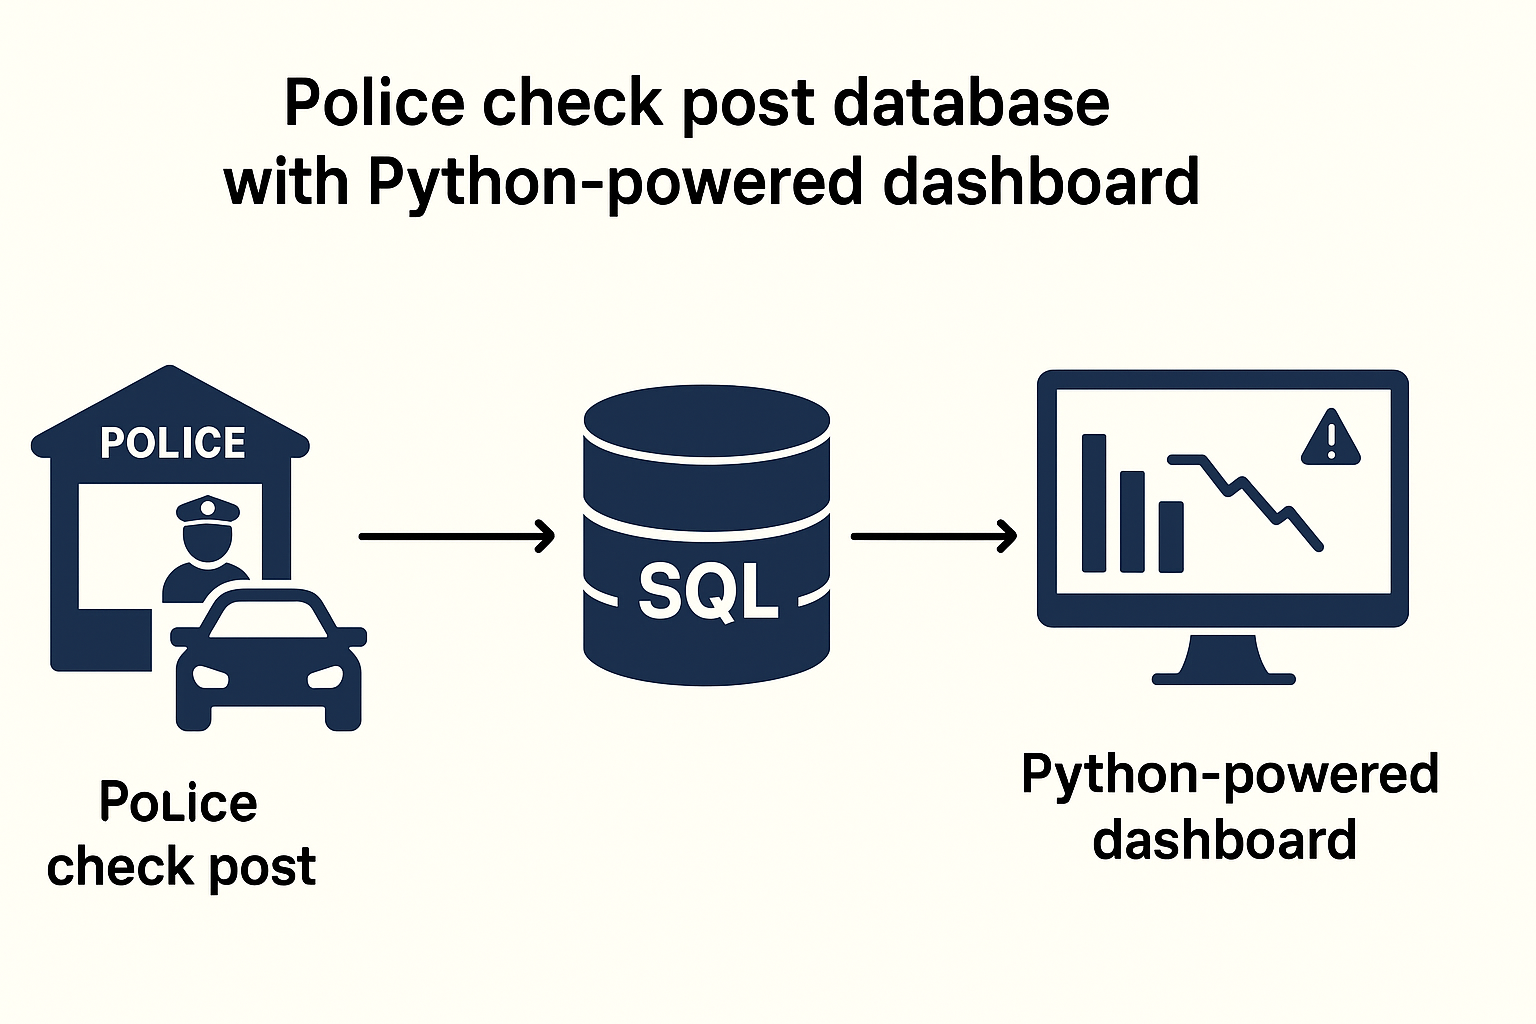

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image, display

display(Image(filename='checkpost_system.png', width=600, height=200))

### Data collection

In [2]:
#Read the Dataset

Traffic_Stops = pd.read_csv('Traffic_Stops.csv')
Traffic_Stops

C:\Users\DELL\AppData\Local\Temp\ipykernel_2496\2903856102.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Traffic_Stops = pd.read_csv('Traffic_Stops.csv')


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
0,2020-01-01,0:00:00,Canada,M,59,19,Asian,Drunk Driving,Speeding,True,Vehicle Search,Ticket,True,16-30 Min,True,UP76DY3473
1,2020-01-01,0:01:00,India,M,35,58,Other,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,True,RJ83PZ4441
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
4,2020-01-01,0:04:00,Canada,M,62,75,Other,Speeding,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,WB63BB8305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65533,2020-02-15,12:13:00,India,F,54,48,Black,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,DL56GW6568
65534,2020-02-15,12:14:00,Canada,F,18,35,Hispanic,Seatbelt,Other,True,Vehicle Search,Ticket,False,16-30 Min,True,TN73EO7098
65535,2020-02-15,12:15:00,USA,M,27,41,Asian,Seatbelt,DUI,True,Frisk,Ticket,True,30+ Min,True,GJ33MX8328
65536,2020-02-15,12:16:00,Canada,F,49,63,Black,Seatbelt,Other,False,NaN,Warning,True,0-15 Min,True,KA24UZ8488


#### Dataset Explanation

* stop_date – The date when the stop happened. 
* stop_time – The time of the stop. 
* country_name – The country where the stop took place. 
* driver_gender – The gender of the driver (Male or Female). 
* driver_age_raw – The recorded age of the driver (before cleaning). 
* driver_age – The actual age of the driver (after cleaning). 
* driver_race – The race/ethnicity of the driver. 
* violation_raw – The original reason for the stop (before cleaning). 
* violation – The type of violation (Speeding, DUI, etc.). 
* search_conducted – Whether the police searched the driver or vehicle
* search_type – The type of search (Frisk, Vehicle Search, etc.). 
* stop_outcome – The result of the stop (Warning, Citation, Arrest). 
* is_arrested – Whether the driver was arrested (True/False). 
* stop_duration – How long the stop lasted (<5 min, 6-15 min, etc.). 
* drugs_related_stop – Whether the stop was drug-related (True/False).

In [3]:
#To display top 5 records
Traffic_Stops.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
0,2020-01-01,0:00:00,Canada,M,59,19,Asian,Drunk Driving,Speeding,True,Vehicle Search,Ticket,True,16-30 Min,True,UP76DY3473
1,2020-01-01,0:01:00,India,M,35,58,Other,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,True,RJ83PZ4441
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
4,2020-01-01,0:04:00,Canada,M,62,75,Other,Speeding,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,WB63BB8305


In [4]:
# To display bottom 5 records
Traffic_Stops.tail()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
65533,2020-02-15,12:13:00,India,F,54,48,Black,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,DL56GW6568
65534,2020-02-15,12:14:00,Canada,F,18,35,Hispanic,Seatbelt,Other,True,Vehicle Search,Ticket,False,16-30 Min,True,TN73EO7098
65535,2020-02-15,12:15:00,USA,M,27,41,Asian,Seatbelt,DUI,True,Frisk,Ticket,True,30+ Min,True,GJ33MX8328
65536,2020-02-15,12:16:00,Canada,F,49,63,Black,Seatbelt,Other,False,NaN,Warning,True,0-15 Min,True,KA24UZ8488
65537,2020-02-15,12:17:00,USA,F,72,32,Other,Seatbelt,Speeding,True,NaN,Ticket,True,16-30 Min,False,UP89PT2924


In [5]:
Traffic_Stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65538 entries, 0 to 65537
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           65538 non-null  object
 1   stop_time           65538 non-null  object
 2   country_name        65538 non-null  object
 3   driver_gender       65538 non-null  object
 4   driver_age_raw      65538 non-null  int64 
 5   driver_age          65538 non-null  int64 
 6   driver_race         65538 non-null  object
 7   violation_raw       65538 non-null  object
 8   violation           65538 non-null  object
 9   search_conducted    65538 non-null  bool  
 10  search_type         43818 non-null  object
 11  stop_outcome        65538 non-null  object
 12  is_arrested         65538 non-null  bool  
 13  stop_duration       65538 non-null  object
 14  drugs_related_stop  65538 non-null  bool  
 15  vehicle_number      65538 non-null  object
dtypes: bool(3), int64(2), 

In [6]:
Traffic_Stops.dtypes

stop_date             object
stop_time             object
country_name          object
driver_gender         object
driver_age_raw         int64
driver_age             int64
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
vehicle_number        object
dtype: object

#### Dimension of the dataset

In [7]:
Traffic_Stops.shape

(65538, 16)

#### Descriptive Statistics of the Dataset

In [8]:
#Numerical analysis

Traffic_Stops.describe()

,driver_age_raw,driver_age
count,65538.000000,65538.00000
mean,49.055998,49.11221
std,18.174699,18.15012
min,18.000000,18.00000
25%,33.000000,34.00000
50%,49.000000,49.00000
75%,65.000000,65.00000
max,80.000000,80.00000


In [9]:
#object

Traffic_Stops['country_name'].describe()

count     65538
unique        3
top       India
freq      21998
Name: country_name, dtype: object

#### Accessing column wise

In [10]:
Traffic_Stops['country_name']

0        Canada
1         India
2           USA
3        Canada
4        Canada
          ...  
65533     India
65534    Canada
65535       USA
65536    Canada
65537       USA
Name: country_name, Length: 65538, dtype: object

In [11]:
type(Traffic_Stops['country_name'])

pandas.core.series.Series

In [12]:
Traffic_Stops[['driver_gender','driver_age']]

,driver_gender,driver_age
0,M,19
1,M,58
2,M,76
3,M,76
4,M,75
...,...,...
65533,F,48
65534,F,35
65535,M,41
65536,F,63


#### Accsessing row wise
* Index based - iloc
* Label based - loc

In [13]:
#Index based
Traffic_Stops.iloc[65000,:]

stop_date             2020-02-15
stop_time                3:20:00
country_name                 USA
driver_gender                  M
driver_age_raw                47
driver_age                    52
driver_race                Other
violation_raw              Other
violation                  Other
search_conducted            True
search_type                  NaN
stop_outcome             Warning
is_arrested                 True
stop_duration           0-15 Min
drugs_related_stop         False
vehicle_number        DL62QU5184
Name: 65000, dtype: object

In [14]:
Traffic_Stops.iloc[:,2]

0        Canada
1         India
2           USA
3        Canada
4        Canada
          ...  
65533     India
65534    Canada
65535       USA
65536    Canada
65537       USA
Name: country_name, Length: 65538, dtype: object

In [15]:
#Display specified row and column

Traffic_Stops.iloc[[345,234,567,2345,3455],[0,1,11,12]]

,stop_date,stop_time,stop_outcome,is_arrested
345,2020-01-01,5:45:00,Ticket,False
234,2020-01-01,3:54:00,Warning,False
567,2020-01-01,9:27:00,Arrest,True
2345,2020-01-02,15:05:00,Warning,True
3455,2020-01-03,9:35:00,Arrest,True


In [16]:
#Display sequence of row and column
Traffic_Stops.iloc[3456:4442, :]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
3456,2020-01-03,9:36:00,India,F,52,62,Black,Seatbelt,DUI,True,Vehicle Search,Arrest,True,0-15 Min,False,TN13TV3266
3457,2020-01-03,9:37:00,Canada,F,41,35,Other,Signal Violation,DUI,False,Frisk,Warning,False,0-15 Min,False,TN72MV4003
3458,2020-01-03,9:38:00,India,F,41,45,Hispanic,Seatbelt,Other,True,NaN,Warning,False,16-30 Min,True,RJ64DB7523
3459,2020-01-03,9:39:00,Canada,M,74,19,Asian,Seatbelt,Other,True,NaN,Arrest,True,30+ Min,True,GJ83JF1610
3460,2020-01-03,9:40:00,USA,F,67,21,Asian,Seatbelt,Speeding,False,NaN,Arrest,True,30+ Min,False,UP62YO3732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,2020-01-04,1:57:00,USA,M,39,70,Black,Signal Violation,Speeding,False,NaN,Ticket,False,16-30 Min,True,UP27RF8873
4438,2020-01-04,1:58:00,India,M,19,36,Black,Speeding,Speeding,False,Vehicle Search,Warning,False,30+ Min,False,MH71UM4746
4439,2020-01-04,1:59:00,India,F,30,29,Other,Seatbelt,Seatbelt,True,NaN,Warning,True,30+ Min,True,UP53KP8374
4440,2020-01-04,2:00:00,USA,F,63,19,Other,Signal Violation,Seatbelt,False,NaN,Arrest,True,30+ Min,True,WB72LV6330


In [17]:
Traffic_Stops.iloc[3456:4442:5, :]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
3456,2020-01-03,9:36:00,India,F,52,62,Black,Seatbelt,DUI,True,Vehicle Search,Arrest,True,0-15 Min,False,TN13TV3266
3461,2020-01-03,9:41:00,USA,F,36,49,Black,Speeding,DUI,True,Frisk,Arrest,False,0-15 Min,True,RJ45CQ3427
3466,2020-01-03,9:46:00,India,F,75,77,White,Seatbelt,Other,False,Frisk,Ticket,False,16-30 Min,False,DL62YK9483
3471,2020-01-03,9:51:00,Canada,F,34,22,Asian,Drunk Driving,Speeding,True,NaN,Warning,True,30+ Min,True,DL35QG8275
3476,2020-01-03,9:56:00,Canada,M,47,52,Black,Signal Violation,DUI,False,NaN,Warning,True,0-15 Min,False,DL68LD2912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,2020-01-04,1:41:00,India,M,63,41,Other,Speeding,Speeding,True,NaN,Ticket,True,30+ Min,True,DL53UT8056
4426,2020-01-04,1:46:00,India,M,42,71,Hispanic,Seatbelt,Seatbelt,False,NaN,Warning,True,0-15 Min,False,DL33ED4941
4431,2020-01-04,1:51:00,USA,F,65,22,Hispanic,Speeding,Other,True,NaN,Arrest,False,16-30 Min,False,MH91YH8862
4436,2020-01-04,1:56:00,Canada,M,74,64,Asian,Speeding,Speeding,False,Frisk,Warning,True,30+ Min,True,GJ54VY9285


In [18]:
#Label based
Traffic_Stops.loc[3456, :]

stop_date                 2020-01-03
stop_time                    9:36:00
country_name                   India
driver_gender                      F
driver_age_raw                    52
driver_age                        62
driver_race                    Black
violation_raw               Seatbelt
violation                        DUI
search_conducted                True
search_type           Vehicle Search
stop_outcome                  Arrest
is_arrested                     True
stop_duration               0-15 Min
drugs_related_stop             False
vehicle_number            TN13TV3266
Name: 3456, dtype: object

In [19]:
Traffic_Stops.loc[3456, 'violation_raw']

'Seatbelt'

In [20]:
#condition
Traffic_Stops.loc[Traffic_Stops['driver_age']>75, :]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
10,2020-01-01,0:10:00,India,F,66,76,Black,Speeding,Signal,False,NaN,Ticket,False,30+ Min,True,UP67CQ9426
24,2020-01-01,0:24:00,India,M,33,76,Hispanic,Signal Violation,Speeding,False,NaN,Warning,False,16-30 Min,False,MH83XS7688
38,2020-01-01,0:38:00,Canada,F,29,76,Hispanic,Speeding,Signal,True,Vehicle Search,Arrest,False,0-15 Min,False,RJ86OH2697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65512,2020-02-15,11:52:00,Canada,F,22,76,Other,Signal Violation,Signal,True,Vehicle Search,Arrest,True,16-30 Min,True,MH40QS1450
65513,2020-02-15,11:53:00,India,F,19,79,Black,Speeding,DUI,True,NaN,Ticket,False,30+ Min,True,UP83UH8771
65521,2020-02-15,12:01:00,India,M,24,78,Asian,Seatbelt,Seatbelt,False,Vehicle Search,Ticket,False,30+ Min,True,MH42PF3736
65522,2020-02-15,12:02:00,USA,M,71,80,Hispanic,Drunk Driving,Seatbelt,True,Vehicle Search,Arrest,True,30+ Min,False,RJ87IU6720


In [21]:
Traffic_Stops.loc[(Traffic_Stops['driver_age']>75) | (Traffic_Stops['driver_gender']=='F') , :]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number
2,2020-01-01,0:02:00,USA,M,26,76,Black,Signal Violation,Speeding,False,Frisk,Ticket,True,16-30 Min,True,RJ32OM7264
3,2020-01-01,0:03:00,Canada,M,26,76,Black,Speeding,DUI,True,Frisk,Warning,False,0-15 Min,True,RJ76TI3807
5,2020-01-01,0:05:00,Canada,F,44,73,Other,Drunk Driving,Other,True,Vehicle Search,Ticket,False,16-30 Min,False,MH89ZF7676
6,2020-01-01,0:06:00,USA,F,80,70,White,Signal Violation,Speeding,False,Vehicle Search,Ticket,False,30+ Min,False,KA40AD3153
8,2020-01-01,0:08:00,USA,F,80,30,Hispanic,Other,Seatbelt,True,Frisk,Arrest,False,0-15 Min,True,DL50PO5101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,2020-02-15,12:09:00,India,F,63,78,Black,Seatbelt,Seatbelt,True,NaN,Warning,False,0-15 Min,False,DL13IZ8119
65533,2020-02-15,12:13:00,India,F,54,48,Black,Other,Other,False,Vehicle Search,Arrest,True,16-30 Min,False,DL56GW6568
65534,2020-02-15,12:14:00,Canada,F,18,35,Hispanic,Seatbelt,Other,True,Vehicle Search,Ticket,False,16-30 Min,True,TN73EO7098
65536,2020-02-15,12:16:00,Canada,F,49,63,Black,Seatbelt,Other,False,NaN,Warning,True,0-15 Min,True,KA24UZ8488


### Data Cleaning

#### Check for missing values

In [22]:
Traffic_Stops.isnull().sum()

stop_date                 0
stop_time                 0
country_name              0
driver_gender             0
driver_age_raw            0
driver_age                0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           21720
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
vehicle_number            0
dtype: int64

In [23]:
### Filling the missing records
Traffic_Stops.search_type = Traffic_Stops.search_type.fillna("Not Searched")

In [24]:
Traffic_Stops.isnull().sum()

stop_date             0
stop_time             0
country_name          0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
vehicle_number        0
dtype: int64

In [25]:
Traffic_Stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65538 entries, 0 to 65537
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           65538 non-null  object
 1   stop_time           65538 non-null  object
 2   country_name        65538 non-null  object
 3   driver_gender       65538 non-null  object
 4   driver_age_raw      65538 non-null  int64 
 5   driver_age          65538 non-null  int64 
 6   driver_race         65538 non-null  object
 7   violation_raw       65538 non-null  object
 8   violation           65538 non-null  object
 9   search_conducted    65538 non-null  bool  
 10  search_type         65538 non-null  object
 11  stop_outcome        65538 non-null  object
 12  is_arrested         65538 non-null  bool  
 13  stop_duration       65538 non-null  object
 14  drugs_related_stop  65538 non-null  bool  
 15  vehicle_number      65538 non-null  object
dtypes: bool(3), int64(2), 

In [26]:
from datetime import datetime
now_time=datetime.now().time()
print(now_time)

12:24:42.629580


#### Convert the datatype(object) to datetime

In [27]:
Traffic_Stops['stop_time'] = pd.to_datetime(Traffic_Stops['stop_time'], format='%H:%M:%S', errors='coerce')

In [28]:
Traffic_Stops['stop_date'] = pd.to_datetime(Traffic_Stops['stop_date'], format='%Y-%m-%d', errors='coerce')

### Connecting MySQL server

In [29]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pymysql

In [31]:
myconnection = pymysql.connect(host = '127.0.0.1',user='root',password='Mirthi@26')

In [32]:
cur = myconnection.cursor()

cur.execute("use Traffic_Stops")

In [33]:
cur.execute("create database Traffic_Stops")

1

In [34]:
cur.execute("""create table Traffic_Stops.digital_ledger(
stop_date date,
stop_time time,
country_name varchar(50),
driver_gender char(1),
driver_age_raw int,
driver_age int,
driver_race varchar(50),
violation_raw varchar(50),
violation varchar(50),
search_conducted boolean,
search_type varchar(50),
stop_outcome varchar(50),
is_arrested boolean,
stop_duration varchar(20),
drugs_related_stop boolean,
vehicle_number varchar(15))""")

0

In [35]:
myconnection.commit()

### Inserting from dataframe to sql using tolist()

In [36]:
data_to_list=Traffic_Stops.values.tolist()
query="""insert into Traffic_Stops.digital_ledger(stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,vehicle_number)
values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
cur.execute("set global max_allowed_packet=67108864")   #this line mentions max allowed data pockets as the data set is large
cur.executemany(query,data_to_list)

myconnection.commit()

### Vehicle-Based

#### Top 10 vehicle_Number involved in drug-related stops

In [37]:
cur.execute("""select vehicle_number,count(*) as count from Traffic_Stops.digital_ledger
where drugs_related_stop=TRUE
group by vehicle_number
order by count desc
limit 10""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))


vehicle_number      count
----------------  -------
UP76DY3473              1
RJ83PZ4441              1
RJ32OM7264              1
RJ76TI3807              1
DL75KZ7835              1
DL50PO5101              1
UP67CQ9426              1
KA61JB1004              1
WB70IV9884              1
WB75TF1052              1


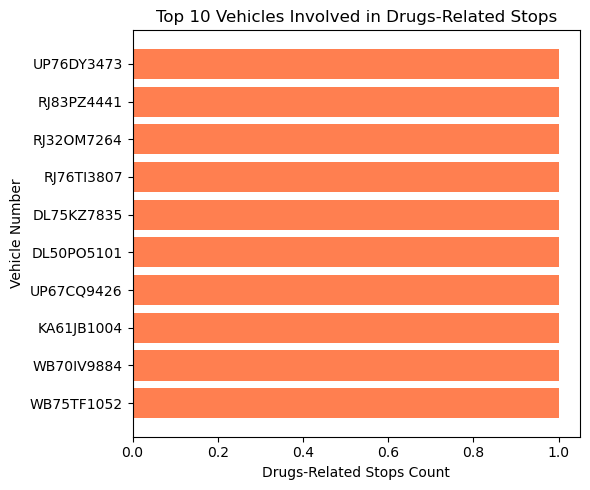

In [38]:
vehicle_numbers = [row[0] for row in a]
counts = [row[1] for row in a]

plt.figure(figsize=(6, 5))
plt.barh(vehicle_numbers, counts, color='coral')
plt.xlabel('Drugs-Related Stops Count')
plt.ylabel('Vehicle Number')
plt.title('Top 10 Vehicles Involved in Drugs-Related Stops')
plt.gca().invert_yaxis()  # Optional: puts highest count at top
plt.tight_layout()
plt.show()

#### Vehicles were most frequently searched

In [39]:
cur.execute("""select vehicle_number,count(*) as most_frequent_search_count
from Traffic_Stops.digital_ledger
where search_conducted =TRUE
group by vehicle_number
order by most_frequent_search_count desc
limit 15""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))


vehicle_number      most_frequent_search_count
----------------  ----------------------------
UP76DY3473                                   1
RJ76TI3807                                   1
MH89ZF7676                                   1
DL50PO5101                                   1
KA79RD2271                                   1
WB75TF1052                                   1
UP82DB7554                                   1
MH15GS2782                                   1
MH80WR1351                                   1
WB35BJ2947                                   1
GJ24GN5905                                   1
MH17TG9873                                   1
RJ65DM5842                                   1
RJ71DT4429                                   1
WB45XD7874                                   1


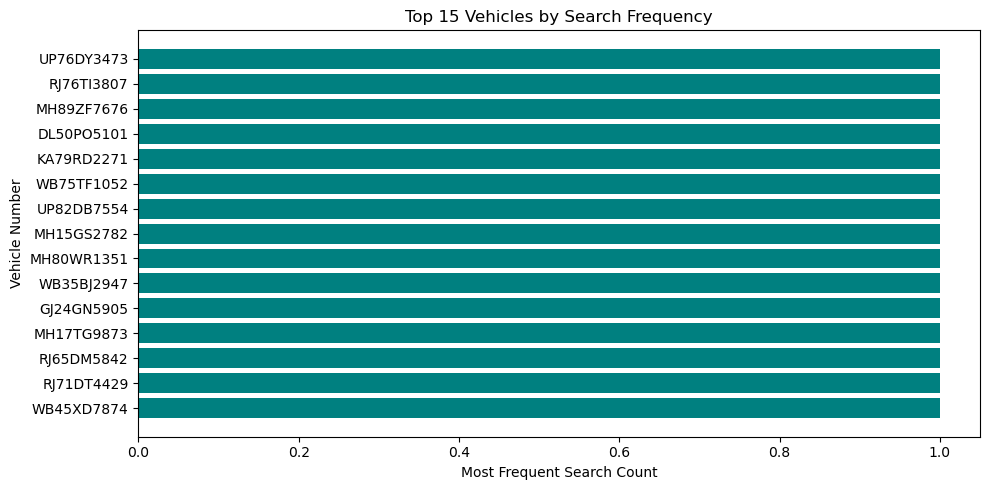

In [40]:
vehicle_numbers = [row[0] for row in a]
search_counts = [row[1] for row in a]

plt.figure(figsize=(10, 5))
plt.barh(vehicle_numbers, search_counts, color='teal')
plt.xlabel('Most Frequent Search Count')
plt.ylabel('Vehicle Number')
plt.title('Top 15 Vehicles by Search Frequency')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

### Demographic-Based 

#### Driver age group had the highest arrest rate

In [41]:
cur.execute("""select min(driver_age) as min_age,max(driver_age) as max_age from Traffic_Stops.digital_ledger""")
a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

  min_age    max_age
---------  ---------
       18         80


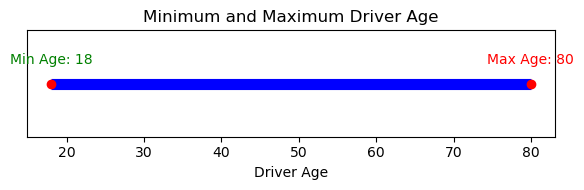

In [42]:
min_age, max_age = a[0]

plt.figure(figsize=(6, 2))
plt.hlines(1, min_age, max_age, color='blue', linewidth=8)
plt.plot([min_age, max_age], [1, 1], 'ro')
plt.text(min_age, 1.02, f'Min Age: {min_age}', ha='center', color='green')
plt.text(max_age, 1.02, f'Max Age: {max_age}', ha='center', color='red')
plt.yticks([])
plt.xlabel('Driver Age')
plt.title('Minimum and Maximum Driver Age')
plt.tight_layout()
plt.show()

In [43]:
cur.execute("""select case
    when driver_age between 18 and 25 then '18-25'
    when driver_age between 26 and 35 then '26-35'
    when driver_age between 36 and 45 then '36-45'
    when driver_age between 46 and 60 then '46-60'
    else '60+' 
end as age_group,

count(*) as total_stops,
count(case when is_arrested =TRUE then 1 end) as arrests,
round(count(case when is_arrested =TRUE then 1 end)/count(*)*100.0,2) as arrest_rate

from Traffic_Stops.digital_ledger
group by age_group
order by arrest_rate desc limit 1""")


a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))


age_group      total_stops    arrests    arrest_rate
-----------  -------------  ---------  -------------
18-25                 8137       4171          51.26


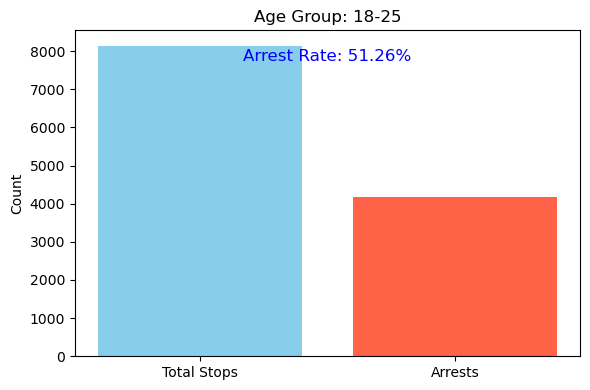

In [44]:
age_group, total_stops, arrests, arrest_rate = a[0]

fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart for total_stops and arrests
ax.bar(['Total Stops', 'Arrests'], [total_stops, arrests], color=['skyblue', 'tomato'])
ax.set_ylabel('Count')
ax.set_title(f'Age Group: {age_group}')

# Annotate arrest rate
ax.text(0.5, max(total_stops, arrests)*0.95, f'Arrest Rate: {arrest_rate}%', ha='center', color='blue', fontsize=12)

plt.tight_layout()
plt.show()

#### Gender distribution of drivers stopped in each country

In [45]:
cur.execute("""select country_name,count(case when driver_gender='M' then 1 end) as MALE,count(case when driver_gender='F' then 1 end) as FEMALE from Traffic_Stops.digital_ledger
group by country_name """)

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))



country_name      MALE    FEMALE
--------------  ------  --------
Canada           10911     10997
India            10955     11043
USA              10791     10841


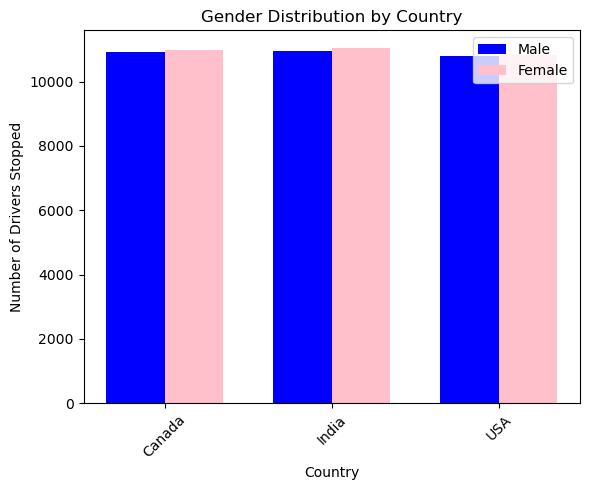

In [46]:
countries = [row[0] for row in a]
male_counts = [row[1] for row in a]
female_counts = [row[2] for row in a]

x = np.arange(len(countries))  # positions for countries
bar_width = 0.35

plt.figure(figsize=(6, 5))
plt.bar(x, male_counts, width=bar_width, label='Male', color='blue')
plt.bar(x + bar_width, female_counts, width=bar_width, label='Female', color='pink')

plt.xlabel('Country')
plt.ylabel('Number of Drivers Stopped')
plt.title('Gender Distribution by Country')
plt.xticks(x + bar_width/2, countries, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Race and gender combination has the highest search rate

In [47]:
cur.execute("""select
driver_race,
driver_gender,
round(count(case when search_conducted =TRUE then 1 end)/count(*)*100.0, 2) as search_rate
from Traffic_Stops.digital_ledger
group by driver_race, driver_gender
order by search_rate DESC
limit 1          
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))



driver_race    driver_gender      search_rate
-------------  ---------------  -------------
Asian          F                        51.29


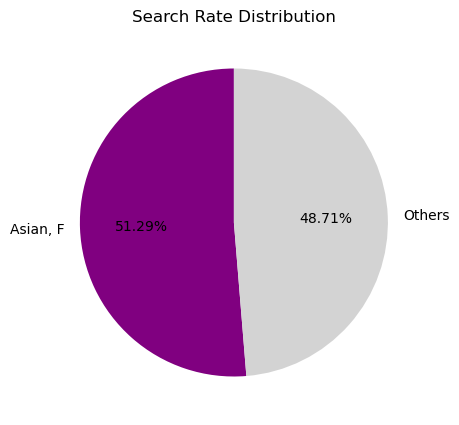

In [48]:
label = f"{a[0][0]}, {a[0][1]}"
rate = a[0][2]
labels = [label, 'Others']
sizes = [rate, 100-rate]
colors = ['purple', 'lightgray']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.2f%%')
plt.title('Search Rate Distribution')
plt.show()

### Time & Duration Based 

#### Time of day sees the most traffic stops


In [49]:
cur.execute("""select hour(str_to_date(stop_time,'%H:%i')) as hour_of_the_day,count(*) as stop_count
from Traffic_Stops.digital_ledger
group by hour_of_the_day
order by stop_count DESC
limit 1
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))


  hour_of_the_day    stop_count
-----------------  ------------
                0          2760


#### Average stop duration for different violations

In [50]:
cur.execute("""select violation,
avg(case
        when stop_duration = '0-15 Min' then 7.5
        when stop_duration = '16-30 Min' then 23
        when stop_duration = '30+ Min' then 35
        END) as average_stop_duration
from Traffic_Stops.digital_ledger
group by violation""")


a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      average_stop_duration
-----------  -----------------------
Speeding                     21.7945
Other                        22.2033
DUI                          21.7413
Seatbelt                     21.8332
Signal                       21.7121


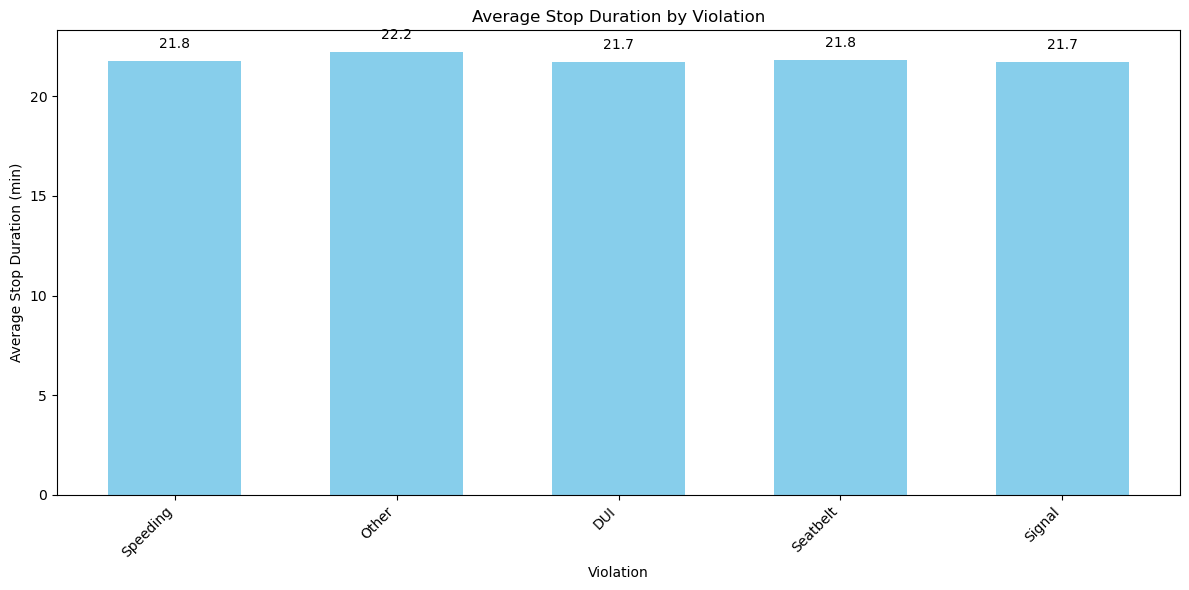

In [51]:
violations = [row[0] for row in a]
avg_durations = [row[1] for row in a]

x = np.arange(len(violations))
width = 0.6

plt.figure(figsize=(12,6))
bars = plt.bar(x, avg_durations, width, color='skyblue')

plt.xlabel('Violation')
plt.ylabel('Average Stop Duration (min)')
plt.title('Average Stop Duration by Violation')
plt.xticks(x, violations, rotation=45, ha='right')

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Are the stops during the night more likely to lead to arrests

In [52]:
cur.execute("""select
   case
        when hour(str_to_date(stop_time,'%H:%i'))>=18 or hour(str_to_date(stop_time,'%H:%i'))<6 
        then 'NIGHT'
        else 'DAY'
    end as stop_period,
    count(*) as total_stops,
    count(case when is_arrested=TRUE then 1 end) as arrests,
    round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2) as arrest_rate_percent
from Traffic_Stops.digital_ledger
group by stop_period
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

stop_period      total_stops    arrests    arrest_rate_percent
-------------  -------------  ---------  ---------------------
NIGHT                  32760      16289                  49.72
DAY                    32778      16557                  50.51


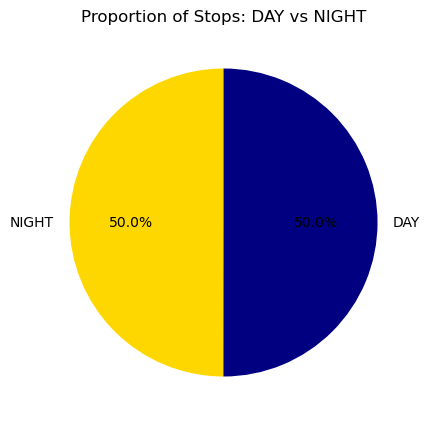

In [53]:
import matplotlib.pyplot as plt

labels = [row[0] for row in a]
sizes = [row[1] for row in a]  # Use total_stops column
colors = ['gold', 'navy']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Stops: DAY vs NIGHT')
plt.show()


### Violation-Based 

#### Violations are most associated with searches or arrests

In [54]:
cur.execute("""select violation,
  count(case when search_conducted=TRUE then 1 end) as count_of_the_search,
  count(case when is_arrested=TRUE then 1 end) as count_of_the_arrest,
  round(count(case when search_conducted=TRUE then 1 end)/count(*)*100.0,2) as search_rate,
  round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2) as arrest_rate,
  greatest(round(count(case when search_conducted=TRUE then 1 end)/count(*)*100.0,2),round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2)) as maximum_arrest_or_search_rate
from Traffic_Stops.digital_ledger
group by violation
order by maximum_arrest_or_search_rate desc limit 1
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      count_of_the_search    count_of_the_arrest    search_rate    arrest_rate    maximum_arrest_or_search_rate
-----------  ---------------------  ---------------------  -------------  -------------  -------------------------------
DUI                           6481                   6610          49.57          50.55                            50.55


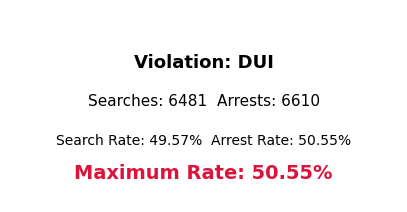

In [55]:
violation, search_count, arrest_count, search_rate, arrest_rate, max_rate = a[0]
plt.figure(figsize=(5,2.5))
plt.axis('off')
plt.text(0.5, 0.7, f"Violation: {violation}", ha='center', fontsize=13, fontweight='bold')
plt.text(0.5, 0.5, f"Searches: {search_count}  Arrests: {arrest_count}", ha='center', fontsize=11)
plt.text(0.5, 0.3, f"Search Rate: {search_rate}%  Arrest Rate: {arrest_rate}%", ha='center', fontsize=10)
plt.text(0.5, 0.12, f"Maximum Rate: {max_rate}%", ha='center', fontsize=14, color='crimson', fontweight='bold')
plt.show()


#### Violations are most common among younger drivers (<25)


In [56]:
cur.execute("""select violation,count(*) as counts_of_driver from Traffic_Stops.digital_ledger
where driver_age<25
group by violation
order by counts_of_driver desc limit 1              
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      counts_of_driver
-----------  ------------------
Speeding                   1476


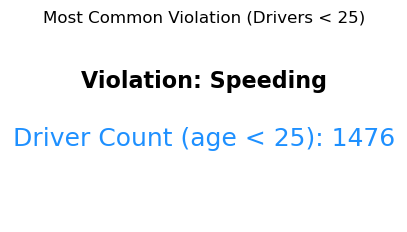

In [57]:
import matplotlib.pyplot as plt

violation, count_of_driver = a[0]

plt.figure(figsize=(5,2.5))
plt.axis('off')
plt.text(0.5, 0.7, f"Violation: {violation}", ha='center', fontsize=16, fontweight='bold')
plt.text(0.5, 0.4, f"Driver Count (age < 25): {count_of_driver}", ha='center', fontsize=18, color='dodgerblue')
plt.title("Most Common Violation (Drivers < 25)")
plt.show()



#### Violation that rarely results in search or arrest

In [58]:
cur.execute("""select violation,
  count(case when search_conducted=TRUE then 1 end) as count_of_the_search,
  count(case when is_arrested=TRUE then 1 end) as count_of_the_arrest,
  round(count(case when search_conducted=TRUE then 1 end)/count(*)*100.0,2) as search_rate,
  round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2) as arrest_rate,
  least(round(count(case when search_conducted=TRUE then 1 end)/count(*)*100.0,2),round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2)) as rarely_arrest_or_search_rate
from Traffic_Stops.digital_ledger
group by violation
order by rarely_arrest_or_search_rate asc limit 1
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      count_of_the_search    count_of_the_arrest    search_rate    arrest_rate    rarely_arrest_or_search_rate
-----------  ---------------------  ---------------------  -------------  -------------  ------------------------------
Other                         6576                   6516          49.84          49.39                           49.39


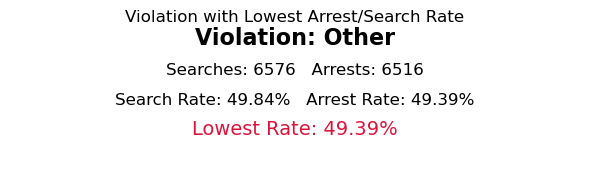

In [59]:
import matplotlib.pyplot as plt

violation, count_of_search, count_of_arrest, search_rate, arrest_rate, rarely_rate = a[0]

plt.figure(figsize=(6,2))
plt.axis('off')
plt.text(0.5, 0.9, f"Violation: {violation}", ha='center', fontsize=16, fontweight='bold')
plt.text(0.5, 0.7, f"Searches: {count_of_search}   Arrests: {count_of_arrest}", ha='center', fontsize=12)
plt.text(0.5, 0.5, f"Search Rate: {search_rate}%   Arrest Rate: {arrest_rate}%", ha='center', fontsize=12)
plt.text(0.5, 0.3, f"Lowest Rate: {rarely_rate}%", ha='center', fontsize=14, color='crimson')
plt.title("Violation with Lowest Arrest/Search Rate")
plt.tight_layout()
plt.show()


### Location-Based

#### Countries report the highest rate of drug-related stops

In [60]:
cur.execute("""select country_name,
count(*) as tot_counts,
round(count(case when drugs_related_stop=TRUE then 1 end)/count(*)*100.0,2) as drugs_related_stop_rates
from Traffic_Stops.digital_ledger
group by country_name 
order by drugs_related_stop_rates desc limit 1                                
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

country_name      tot_counts    drugs_related_stop_rates
--------------  ------------  --------------------------
USA                    21632                       50.37


#### Arrest rate by country and violation

In [61]:
cur.execute("""select country_name,violation,
count(*) as tot_count,
round(count(case when is_arrested=TRUE then 1 end)/count(*)*100.0,2) as arrest_rate
from Traffic_Stops.digital_ledger
group by country_name,violation""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

country_name    violation      tot_count    arrest_rate
--------------  -----------  -----------  -------------
Canada          Speeding            4375          49.94
India           Other               4431          49.29
USA             Speeding            4417          49.83
Canada          DUI                 4414          51.13
Canada          Other               4371          50.29
USA             Seatbelt            4241          50.58
USA             Signal              4341          49.99
India           Signal              4444          50.65
Canada          Signal              4327          49.18
USA             DUI                 4241          49.66
India           DUI                 4420          50.84
India           Speeding            4358          50.76
USA             Other               4392          48.59
India           Seatbelt            4345          50.56
Canada          Seatbelt            4421          50.46


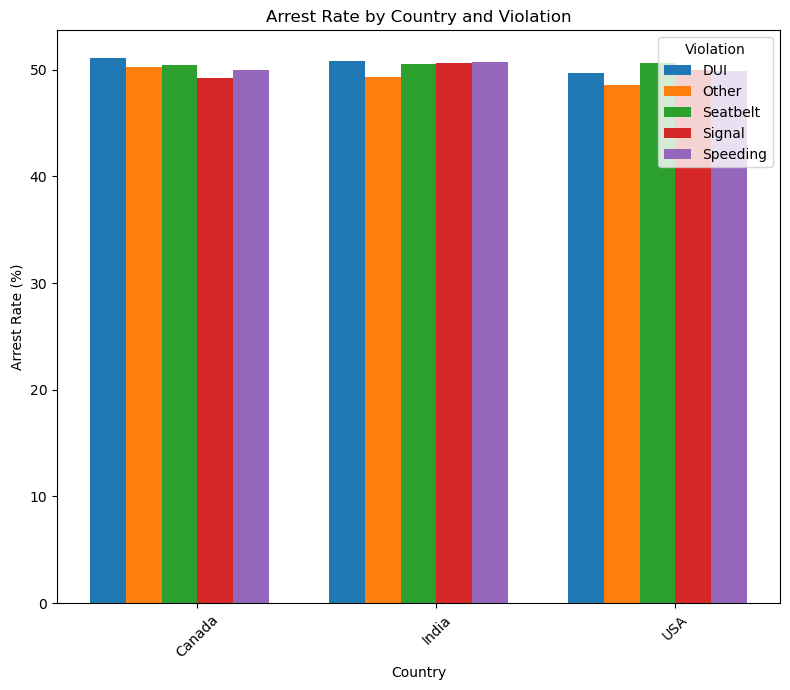

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data:
# a = [('US', 'Speeding', 120, 14.2), ...]
countries = sorted(set(row[0] for row in a))
violations = sorted(set(row[1] for row in a))
bar_width = 0.15
ind = np.arange(len(countries))

arrest_rate_matrix = []
for v in violations:
    arrest_rates = []
    for c in countries:
        filtered = [row[3] for row in a if row[0] == c and row[1] == v]
        arrest_rates.append(filtered[0] if filtered else 0)
    arrest_rate_matrix.append(arrest_rates)

plt.figure(figsize=(max(8, len(countries)), 7))
for i, (violation, rates) in enumerate(zip(violations, arrest_rate_matrix)):
    plt.bar(ind + i * bar_width, rates, bar_width, label=violation)

plt.xlabel('Country')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rate by Country and Violation')
plt.xticks(ind + bar_width * (len(violations)/2), countries, rotation=45)
plt.legend(title="Violation")
plt.tight_layout()
plt.show()


#### Country has the most stops with search conducted

In [63]:
cur.execute("""select country_name,count(case when search_conducted=TRUE then 1 end) as no_of_counts from Traffic_Stops.digital_ledger
group by country_name
order by no_of_counts desc limit 1""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

country_name      no_of_counts
--------------  --------------
Canada                   11020


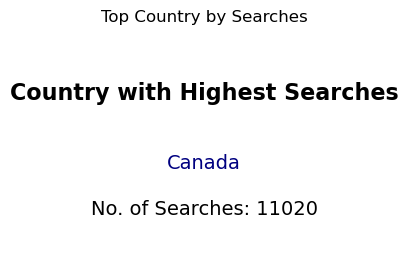

In [64]:
import matplotlib.pyplot as plt

country_name, no_of_counts = a[0]

plt.figure(figsize=(5,3))
plt.axis('off')
plt.text(0.5, 0.7, f"Country with Highest Searches", ha='center', fontsize=16, fontweight='bold')
plt.text(0.5, 0.4, f"{country_name}", ha='center', fontsize=14, color='navy')
plt.text(0.5, 0.2, f"No. of Searches: {no_of_counts}", ha='center', fontsize=14)
plt.title("Top Country by Searches")
plt.show()


#### Yearly Breakdown of Stops and Arrests by Country (Using Subquery and Window Functions)

In [77]:
cur.execute("""
select
    stats.stop_year,
    stats.country_name,
    stats.total_stops,
    stats.total_arrests,
    round(total_arrests/NULLIF(total_stops*100.0,0), 2)as arrest_rate_percent,
    sum(total_arrests) over(partition by country_name 
    order by stop_year
    ) as cumulative_arrests
from(
    select 
        year(str_to_date(stop_date,'%Y-%m-%d'))as stop_year,
        country_name,
        count(*) as total_stops,
        count(if(is_arrested,1,NULL))as total_arrests
    from Traffic_Stops.digital_ledger
    group by stop_year,country_name
)as stats
order by stats.country_name,stats.stop_year
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

  stop_year  country_name      total_stops    total_arrests    arrest_rate_percent    cumulative_arrests
-----------  --------------  -------------  ---------------  ---------------------  --------------------
       2020  Canada                  21908            10999                   0.01                 10999
       2020  India                   21998            11091                   0.01                 11091
       2020  USA                     21632            10756                   0                    10756


#### Driver Violation Trends Based on Age and Race (Join with Subquery) 

In [78]:
cur.execute("""select 
    age_info.age_group,
    r.driver_race,
    count(*) as total_violations
from Traffic_Stops.digital_ledger r
join(
    select distinct
        driver_age,
        case
            when driver_age between 16 and 25 then '16-25'
            when driver_age between 26 and 35 then '26-35'
            when driver_age between 36 and 50 then '36-50'
            when driver_age>50 then '51+'
            else 'Unknown'
        end as age_group from Traffic_Stops.digital_ledger)as age_info on r.driver_age=age_info.driver_age
group by age_info.age_group, r.driver_race
order by age_info.age_group, r.driver_race;
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

age_group    driver_race      total_violations
-----------  -------------  ------------------
16-25        Asian                        1587
16-25        Black                        1670
16-25        Hispanic                     1605
16-25        Other                        1648
16-25        White                        1627
26-35        Asian                        2127
26-35        Black                        2073
26-35        Hispanic                     2084
26-35        Other                        2058
26-35        White                        2032
36-50        Asian                        3140
36-50        Black                        3100
36-50        Hispanic                     3131
36-50        Other                        3164
36-50        White                        3155
51+          Asian                        6257
51+          Black                        6288
51+          Hispanic                     6186
51+          Other                        6252
51+          

#### Time Period Analysis of Stops (Joining with Date Functions) , Number of Stops by Year,Month, Hour of the Day 

In [67]:
cur.execute("""select
year(str_to_date(stop_date,'%Y-%m-%d')) as STOP_YEAR,
month(str_to_date(stop_date,'%Y-%m-%d')) as STOP_MONTH,
hour(str_to_date(stop_time,'%H:%i')) as STOP_HOUR,
count(*) as total_stops
from Traffic_Stops.digital_ledger
group by STOP_YEAR,STOP_MONTH,STOP_HOUR
order by STOP_YEAR,STOP_MONTH,STOP_HOUR
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

  STOP_YEAR    STOP_MONTH    STOP_HOUR    total_stops
-----------  ------------  -----------  -------------
       2020             1            0           1860
       2020             1            1           1860
       2020             1            2           1860
       2020             1            3           1860
       2020             1            4           1860
       2020             1            5           1860
       2020             1            6           1860
       2020             1            7           1860
       2020             1            8           1860
       2020             1            9           1860
       2020             1           10           1860
       2020             1           11           1860
       2020             1           12           1860
       2020             1           13           1860
       2020             1           14           1860
       2020             1           15           1860
       2020             1   

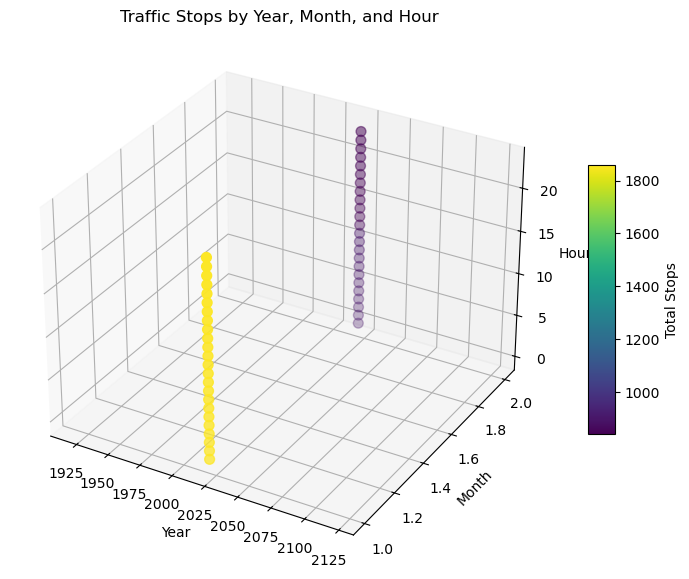

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Parse query results
# a = [(stop_year, stop_month, stop_hour, total_stops), ...]

years = [row[0] for row in a]
months = [row[1] for row in a]
hours = [row[2] for row in a]
total_stops = [row[3] for row in a]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Use stop_year, stop_month, stop_hour as x,y,z coordinates
sc = ax.scatter(years, months, hours, c=total_stops, cmap='viridis', s=50)

ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Hour')
plt.title('Traffic Stops by Year, Month, and Hour')

cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Total Stops')

plt.show()


#### Violations with High Search and Arrest Rates (Window Function) 

In [69]:
cur.execute("""select * from(select distinct violation,
count(*) over(partition by violation) as total_stops,
sum(case when search_conducted=TRUE then 1 else 0 end) over(partition by violation) as total_searches,
sum(case when is_arrested=TRUE then 1 else 0 end) over(partition by violation) as total_arrests,
round(avg(case when search_conducted=TRUE then 1 else 0 end) over(partition by violation)*100,2) as search_rate_percent,
round(avg(case when is_arrested=TRUE then 1 else 0 end) over(partition by violation)*100,2) as arrest_rate_percent
from Traffic_Stops.digital_ledger
)as sub
where search_rate_percent>20 or arrest_rate_percent>20
order by search_rate_percent desc,arrest_rate_percent desc
""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      total_stops    total_searches    total_arrests    search_rate_percent    arrest_rate_percent
-----------  -------------  ----------------  ---------------  ---------------------  ---------------------
Seatbelt             13007              6562             6573                  50.45                  50.53
Speeding             13150              6573             6598                  49.98                  50.17
Other                13194              6576             6516                  49.84                  49.39
Signal               13112              6509             6549                  49.64                  49.95
DUI                  13075              6481             6610                  49.57                  50.55


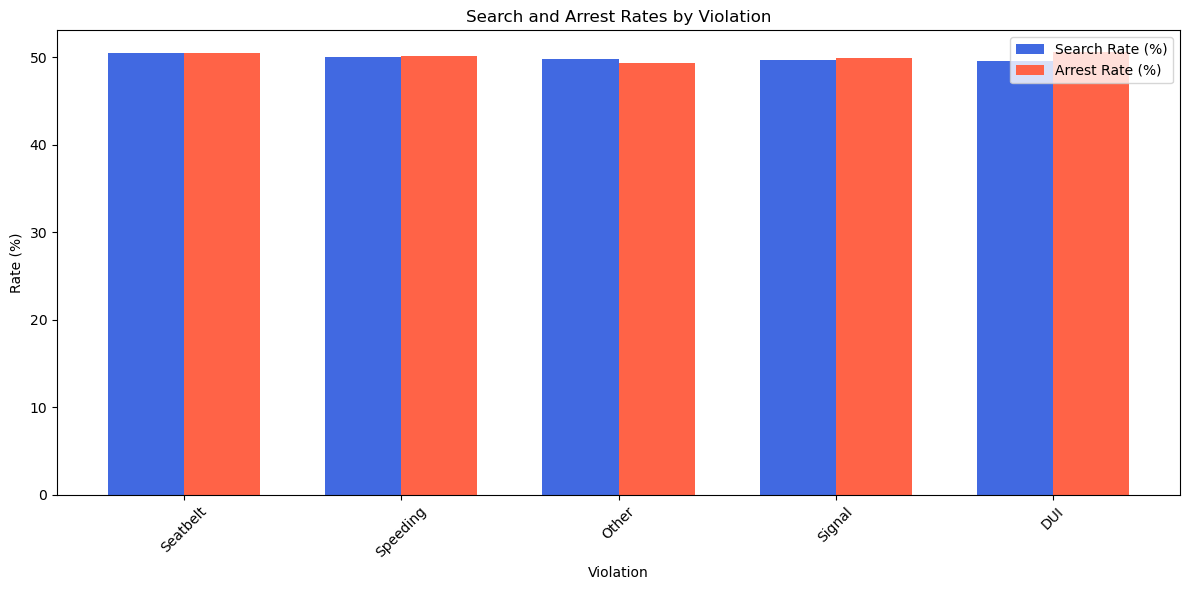

In [70]:
import matplotlib.pyplot as plt
import numpy as np

violations = [row[0] for row in a]
search_rate_percent = [row[4] for row in a]
arrest_rate_percent = [row[5] for row in a]

x = np.arange(len(violations))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x, search_rate_percent, width, label='Search Rate (%)', color='royalblue')
plt.bar(x + width, arrest_rate_percent, width, label='Arrest Rate (%)', color='tomato')

plt.xlabel('Violation')
plt.ylabel('Rate (%)')
plt.title('Search and Arrest Rates by Violation')
plt.xticks(x + width / 2, violations, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Driver Demographics by Country (Age, Gender, and Race) 

In [71]:
cur.execute("""select driver_race from Traffic_Stops.digital_ledger group by driver_race""")
a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

driver_race
-------------
Asian
Other
Black
White
Hispanic


In [72]:
cur.execute("""select driver_age from Traffic_Stops.digital_ledger group by driver_age""")
a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

  driver_age
------------
          19
          58
          76
          75
          73
          70
          50
          30
          21
          53
          46
          25
          51
          55
          71
          41
          47
          59
          60
          56
          61
          69
          39
          23
          26
          24
          64
          68
          65
          67
          74
          32
          28
          18
          43
          48
          78
          77
          22
          31
          37
          35
          40
          20
          63
          49
          45
          38
          72
          79
          36
          66
          80
          44
          54
          34
          29
          33
          62
          27
          42
          52
          57


In [73]:
cur.execute("""select country_name,count(*) as tot_driver,
count(case when driver_gender='M' then 1 end) as Male_driver,
count(case when driver_gender='F' then 1 end) as Female_driver,
count(case when driver_race='Asian' then 1 end) as Asian_driver,
count(case when driver_race='Black' then 1 end) as Black_driver,
count(case when driver_race='Hispanic' then 1 end) as Hispanic_driver,
count(case when driver_race='Other' then 1 end) as Other_people,
count(case when driver_race ='White' then 1 end) as White_driver,
count(case when driver_age<30 then 1 end) as less_than_thirty,
count(case when driver_age between 30 and 50 then 1 end) as between_thirty_and_fifty,
count(case when driver_age>50 then 1 end) as greater_than_fifty                                  
from Traffic_Stops.digital_ledger
group by country_name""")

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

country_name      tot_driver    Male_driver    Female_driver    Asian_driver    Black_driver    Hispanic_driver    Other_people    White_driver    less_than_thirty    between_thirty_and_fifty    greater_than_fifty
--------------  ------------  -------------  ---------------  --------------  --------------  -----------------  --------------  --------------  ------------------  --------------------------  --------------------
Canada                 21908          10911            10997            4344            4342               4395            4398            4429                4177                        7254                 10477
India                  21998          10955            11043            4451            4418               4406            4377            4346                4124                        7355                 10519
USA                    21632          10791            10841            4316            4371               4205            4347            4393 

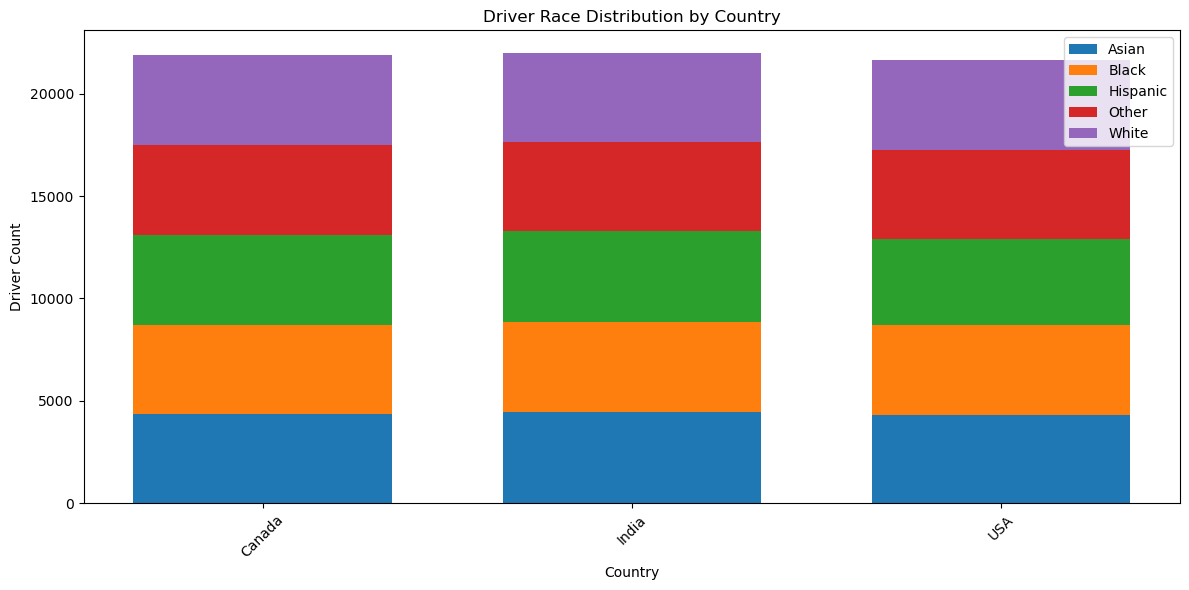

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Example data unpacking for first 3 columns for N countries
countries = [row[0] for row in a]
asian = [row[4] for row in a]
black = [row[5] for row in a]
hispanic = [row[6] for row in a]
other = [row[7] for row in a]
white = [row[8] for row in a]

bar_width = 0.7
ind = np.arange(len(countries))

plt.figure(figsize=(12,6))
plt.bar(ind, asian, bar_width, label='Asian')
plt.bar(ind, black, bar_width, bottom=asian, label='Black')
plt.bar(ind, hispanic, bar_width, bottom=np.array(asian)+np.array(black), label='Hispanic')
plt.bar(ind, other, bar_width, bottom=np.array(asian)+np.array(black)+np.array(hispanic), label='Other')
plt.bar(ind, white, bar_width, bottom=np.array(asian)+np.array(black)+np.array(hispanic)+np.array(other), label='White')

plt.xlabel('Country')
plt.ylabel('Driver Count')
plt.title('Driver Race Distribution by Country')
plt.xticks(ind, countries, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Top 5 Violations with Highest Arrest Rates

In [75]:
cur.execute("""select violation,count(*) as total,
round(count(case when is_arrested=TRUE then 1 end)/count(*)*100,2) as arrest_rate 
from Traffic_Stops.digital_ledger
group by violation
order by arrest_rate desc limit 5                
""") 

a=cur.fetchall()
from tabulate import tabulate
print(tabulate(a,headers=[i[0] for i in cur.description],tablefmt='mysql'))

violation      total    arrest_rate
-----------  -------  -------------
DUI            13075          50.55
Seatbelt       13007          50.53
Speeding       13150          50.17
Signal         13112          49.95
Other          13194          49.39


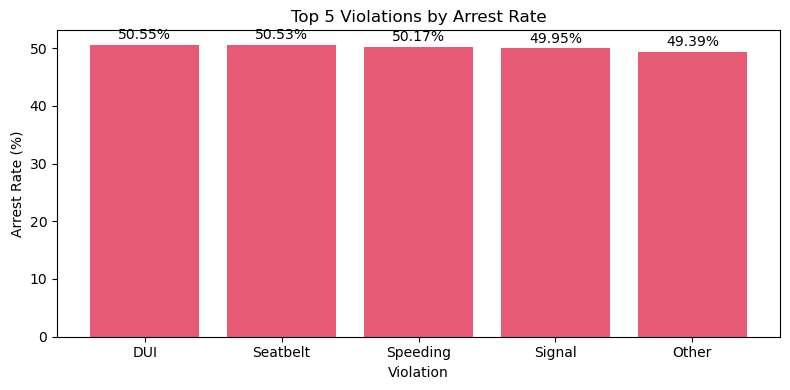

In [76]:
import matplotlib.pyplot as plt

# Example query output:
# a = [('DUI', 500, 50.55), ('Speeding', 700, 50.17), ('Seatbelt', 650, 50.53), ...]

violations = [row[0] for row in a]
totals = [row[1] for row in a]
arrest_rates = [row[2] for row in a]

plt.figure(figsize=(8,4))
bars = plt.bar(violations, arrest_rates, color='crimson', alpha=0.7)
plt.xlabel('Violation')
plt.ylabel('Arrest Rate (%)')
plt.title('Top 5 Violations by Arrest Rate')

# Annotate each bar with its percentage
for bar, rate in zip(bars, arrest_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{rate}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
